In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:

# 读取 CSV 文件
articles_df = pd.read_csv(r'C:\Users\Chen Ray\Skills-Assessment-2\outputs\articles_cleaned.csv')

# 过滤与 APOE 研究相关的文章
apoe_articles_df = articles_df[articles_df['Title'].str.contains('APOE', case=False, na=False) | 
                               articles_df['Abstract'].str.contains('APOE', case=False, na=False)]

# 提取机构信息并去除未知或缺失的机构
institutions = apoe_articles_df['FirstAuthorAffiliation'].dropna()
institutions = institutions[~institutions.str.contains('Unknown', case=False)]
institutions = institutions[institutions.str.strip() != '']

# 统计每个机构的贡献量
institution_counts = institutions.value_counts()

# 打印排名前十的机构及其贡献量
print(institution_counts.head(10))

FirstAuthorAffiliation
Department of Neuroscience, Mayo Clinic, Jacksonville, FL, USA.                                                                                     8
Department of Neurology, Qingdao Municipal Hospital, Qingdao University, Qingdao, China.                                                            7
Department of Neuroscience, Mayo Clinic, 4500 San Pablo Road, Jacksonville, FL, 32224, USA.                                                         6
Department of Medical Epidemiology and Biostatistics, Karolinska Institutet, Stockholm, Sweden.                                                     6
Department of Neurology, Qingdao Municipal Hospital, School of Medicine, Qingdao University, Qingdao, PR China.                                     5
Department of Psychiatry, Washington University School of Medicine, St. Louis, MO 63110, USA.                                                       5
Center for Human and Animal Genetics, Institute of Genetics and Developmental

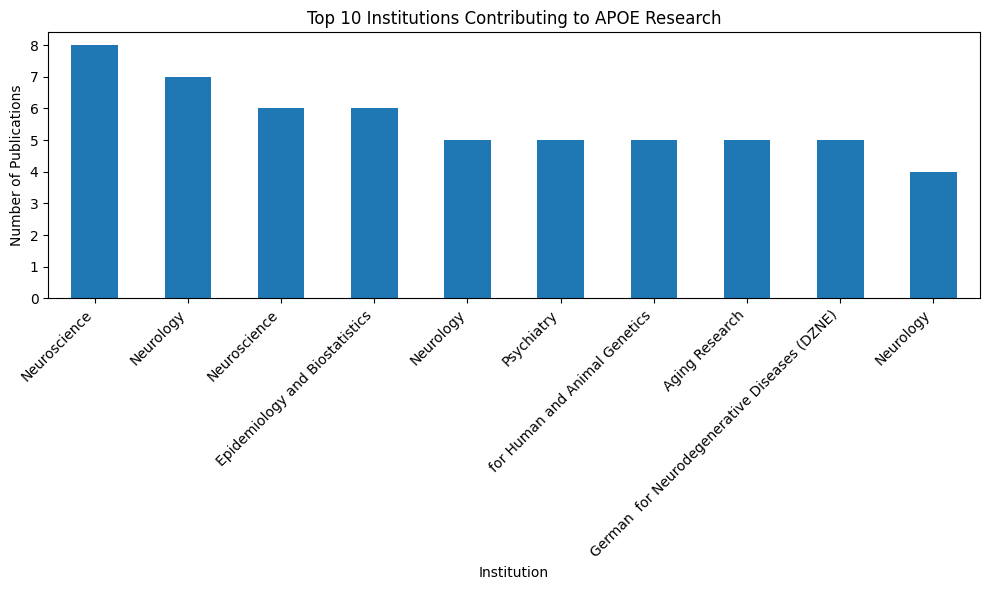

In [14]:
import re

# 选择排名前十的机构
top_institutions = institution_counts.head(10)

# 提取机构名称
top_institutions.index = top_institutions.index.map(lambda x: re.sub(r'Department of |Dept. of |University|Univ.|Institute|Inst.|Medical|Med.|Center|Ctr.|Hospital|Hosp.|,.*', '', x).strip())

# 生成柱状图
plt.figure(figsize=(10, 6))
top_institutions.plot(kind='bar')
plt.title('Top 10 Institutions Contributing to APOE Research')
plt.xlabel('Institution')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 显示图表
plt.show()
